In [ ]:
import requests
import bs4
import re
from time import sleep
import random
import networkx as nx

When you look at a website using a web browser what you see is a rendered view from an HTML code. This graphical version is much easier for us to read, however, it's not trivial to automatize the process of any data retrieval from it. That's why we will use raw HTML form

The first step is to download the content. We can use a request library. Basic usage is very simple.

In [4]:
headers = {
    'User-Agent': 'IRclasses',
}


response = requests.get('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology', headers=headers)
response.status_code # it's wise to check the status code

200

In [5]:
response.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Poznań University of Technology - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-cont

Working with such a string might be problematic. However, HTML is structured and we can benefit from it. The Beautiful Soup package transforms HTML string into a tree form and allows us to query it in a much more efficient and easier way.

In [6]:
parsed = bs4.BeautifulSoup(response.text)
parsed

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Poznań University of Technology - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-

Typically text content is stored in a paragraph element denoted with a 'p' tag. We can take a look at the text from all paragraphs.

In [7]:
for p in parsed.select('p'):
    print(p.getText())



Poznań University of Technology, PUT (Polish: Politechnika Poznańska) is a university in Poznań, Poland.[3] Poznań University of Technology is known as one of the best technical universities in Poland. URAP ranked PUT among the top 6% of world universities and Webometrics ranked it at no. 842 in the world by Google citations for the year 2015. In 1995, it became the first Polish university to become a member of the Conference of European Schools for Advanced Engineering Education and Research (CESAER), an organization comprising the best technical universities in Europe. The university is also a member of the Socrates-Erasmus programme for exchange students from all over Europe, promoting advanced engineering and a European dimension. The university is home to many organizations and student circles, and the radio station Afera 98.6 MHz. The university has over 21,000 students and over 1,100 academic staff.

There are nine faculties (since 2020):

Poznan University of Technology (PUT)

## Task1
Implement a function getText(url)
 - download content from a given url
 - transform it using bs
 - return text from all paragraphs

In [8]:
def getText(url):
    headers = {
    'User-Agent': 'IRclasses',
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        output = response.text
    else:
        return 'Error reading the page'
    parsed = bs4.BeautifulSoup(output)
    output = ''
    for p in parsed.select('p'):
        output += p.getText()

    return output

In [9]:
getText('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology')

"\nPoznań University of Technology, PUT (Polish: Politechnika Poznańska) is a university in Poznań, Poland.[3] Poznań University of Technology is known as one of the best technical universities in Poland. URAP ranked PUT among the top 6% of world universities and Webometrics ranked it at no. 842 in the world by Google citations for the year 2015. In 1995, it became the first Polish university to become a member of the Conference of European Schools for Advanced Engineering Education and Research (CESAER), an organization comprising the best technical universities in Europe. The university is also a member of the Socrates-Erasmus programme for exchange students from all over Europe, promoting advanced engineering and a European dimension. The university is home to many organizations and student circles, and the radio station Afera 98.6\xa0MHz. The university has over 21,000 students and over 1,100 academic staff.\nThere are nine faculties (since 2020):\nPoznan University of Technology (

In [10]:
getText("http://wp.pl")

'Pobieranie, zwielokrotnianie, przechowywanie lub jakiekolwiek inne wykorzystywanie treści dostępnych w niniejszym serwisie - bez względu na ich charakter i sposób wyrażenia (w szczególności lecz nie wyłącznie: słowne, słowno-muzyczne, muzyczne, audiowizualne, audialne, tekstowe, graficzne i zawarte w nich dane i informacje, bazy danych i zawarte w nich dane) oraz formę (np. literackie, publicystyczne, naukowe, kartograficzne, programy komputerowe, plastyczne, fotograficzne) wymaga uprzedniej i jednoznacznej zgody Wirtualna Polska Media Spółka Akcyjna z siedzibą w Warszawie, będącej właścicielem niniejszego serwisu, bez względu na sposób ich eksploracji i wykorzystaną metodę (manualną lub zautomatyzowaną technikę, w tym z użyciem programów uczenia maszynowego lub sztucznej inteligencji). Powyższe zastrzeżenie nie dotyczy wykorzystywania jedynie w celu ułatwienia ich wyszukiwania przez wyszukiwarki internetowe oraz korzystania w ramach stosunków umownych lub dozwolonego użytku określone

Nowadays websites are often dynamic, not static. Working with them would require dealing with javascript. It's possible and there are python packages supporting this processing but we will not cover them in this course.

In [11]:
getText("http://facebook.com")

''

## Task 2
Extract number of students from infobox table

In [12]:
response = requests.get('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology', headers=headers)
parsed = bs4.BeautifulSoup(response.text)
parsed.find('table')

<table class="box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove" role="presentation"><tbody><tr><td class="mbox-image"><div class="mbox-image-div"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Question_book-new.svg"><img alt="" class="mw-file-element" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/60px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/120px-Question_book-new.svg.png 1.5x" width="50"/></a></span></div></td><td class="mbox-text"><div class="mbox-text-span">This article <b>needs additional citations for <a href="/wiki/Wikipedia:Verifiability" title="Wikipedia:Verifiability">verification</a></b>.<span class="hide-when-compact"> Please help <a href="/wiki/Special:EditPage/Pozna%C5%84_University_of_Technology" title="Special:EditPage/Poznań University of Technology"

In this task, you have to extract specific information from a specific table. The table we are interested in is of class infobox and bs allows us to use this information.

In [13]:
parsed.find('table', class_="infobox")

<table class="infobox vcard"><caption class="infobox-title fn org">Poznań University of Technology</caption><tbody><tr><td class="infobox-subheader" colspan="2"><div class="nickname">Politechnika Poznańska</div></td></tr><tr><td class="infobox-full-data nickname" colspan="2"><a class="mw-redirect" href="/wiki/Latin_language" title="Latin language">Latin</a>: <i lang="la">Polytechnica Posnaniensis</i></td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Motto</th><td class="infobox-data"><i>Technologies in a positive climate</i></td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Type</th><td class="infobox-data"><a href="/wiki/Public_university" title="Public university">Public</a></td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Established</th><td class="infobox-data">1955 (1919)</td></tr><tr><th class="infobox-label" scope="row" style="padding-right:0.65em;"><a href="/wiki/Rector_(academia)" tit

Since bs creates a tree structure you can navigate through it and use methods find and find_all on the next nodes.

In [14]:
parsed.find('table', class_="infobox").find_all("tr")

[<tr><td class="infobox-subheader" colspan="2"><div class="nickname">Politechnika Poznańska</div></td></tr>,
 <tr><td class="infobox-full-data nickname" colspan="2"><a class="mw-redirect" href="/wiki/Latin_language" title="Latin language">Latin</a>: <i lang="la">Polytechnica Posnaniensis</i></td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Motto</th><td class="infobox-data"><i>Technologies in a positive climate</i></td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Type</th><td class="infobox-data"><a href="/wiki/Public_university" title="Public university">Public</a></td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Established</th><td class="infobox-data">1955 (1919)</td></tr>,
 <tr><th class="infobox-label" scope="row" style="padding-right:0.65em;"><a href="/wiki/Rector_(academia)" title="Rector (academia)">Rector</a></th><td class="infobox-data">PhD, Prof. Teofil Jesionowski</td></

In [15]:
parsed.find('table', class_="infobox").find_all("tr")[6]

<tr><th class="infobox-label" scope="row" style="padding-right:0.65em;">Students</th><td class="infobox-data">14,138<sup class="reference" id="cite_ref-1"><a href="#cite_note-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup> <small>(12.2023)</small></td></tr>

In [16]:
parsed.find('table', class_="infobox").find_all("tr")[6].find('th').text

'Students'

In [17]:
parsed.find('table', class_="infobox").find_all("tr")[6].find('td').text

'14,138[1] (12.2023)'

Write a function that returns the number of students from the infobox table from the provided URL. You can use inspect tool - just right click on a website, choose inspect and analyze the html structure.

In [18]:
def getStudentCount(url):
  response = requests.get(url, headers=headers)
  parsed = bs4.BeautifulSoup(response.text)
  table = parsed.find('table', class_ = 'infobox')
  if not table:
    raise ValueError('No infobox found on the page')

  rows = table.find_all('tr')
  for row in rows:
    if row.find('th') and row.find('th').text == 'Students':
      numbers = row.find('td').text
      print(numbers)
      break

  numbers = numbers.split('[')[0] #numbers are in form: 14,138[1] (12.2023)
  numbers = numbers.replace(',', '')
  numbers = int(numbers)
  print(numbers)
  return numbers

In [19]:
assert getStudentCount("https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology") == 14138

14,138[1] (12.2023)
14138


In [20]:
assert getStudentCount("https://en.wikipedia.org/wiki/Wroc%C5%82aw_University_of_Science_and_Technology") == 20970

20,970[2] (12.2023)
20970


# Regex
Regular expression is a scheme for defining patterns to be found in a text

Let's try it  https://regexone.com/

## Task 3

We can also retrieve URLs and once we have them we can scrape them as well.

In [21]:
parsed.find_all('a')

[<a class="mw-jump-link" href="#bodyContent">Jump to content</a>,
 <a accesskey="z" href="/wiki/Main_Page" title="Visit the main page [z]"><span>Main page</span></a>,
 <a href="/wiki/Wikipedia:Contents" title="Guides to browsing Wikipedia"><span>Contents</span></a>,
 <a href="/wiki/Portal:Current_events" title="Articles related to current events"><span>Current events</span></a>,
 <a accesskey="x" href="/wiki/Special:Random" title="Visit a randomly selected article [x]"><span>Random article</span></a>,
 <a href="/wiki/Wikipedia:About" title="Learn about Wikipedia and how it works"><span>About Wikipedia</span></a>,
 <a href="//en.wikipedia.org/wiki/Wikipedia:Contact_us" title="How to contact Wikipedia"><span>Contact us</span></a>,
 <a href="/wiki/Help:Contents" title="Guidance on how to use and edit Wikipedia"><span>Help</span></a>,
 <a href="/wiki/Help:Introduction" title="Learn how to edit Wikipedia"><span>Learn to edit</span></a>,
 <a href="/wiki/Wikipedia:Community_portal" title="The

It's important to add some delay between accessing the next page. Otherwise, you might cause too much traffic and be temporarily banned

In [22]:
links = parsed.find_all('a', attrs={'href': re.compile(r'^/wiki')}) # find all links starting with /wiki
random.shuffle(links)
for link in links[:10]:
    print(link['href'])
    response = requests.get("https://en.wikipedia.org" + link['href'])
    print(response.status_code)
    sleep(random.random()*3)

/wiki/University_of_Stuttgart
403
/wiki/Technion_%E2%80%93_Israel_Institute_of_Technology
403
/wiki/Rector_(academia)
403
/wiki/Agricultural_University_of_Krak%C3%B3w
403
/wiki/KU_Leuven
403
/wiki/Nicolaus_Copernicus_University_in_Toru%C5%84
403
/wiki/Universities_in_Poznan
403
/wiki/University_of_Bielsko-Bia%C5%82a
403
/wiki/Norwegian_University_of_Science_and_Technology
403
/wiki/Special:WhatLinksHere/Pozna%C5%84_University_of_Technology
403


implement DFS based on the code above, try to avoid links not leading to an article

In [23]:
def dfs(link):



SyntaxError: incomplete input (2798088709.py, line 2)

In [ ]:
dfs('https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology')

write BFS with printing current link

In [ ]:
def bfs(link):



## Networkx

It's a package for working with various networks

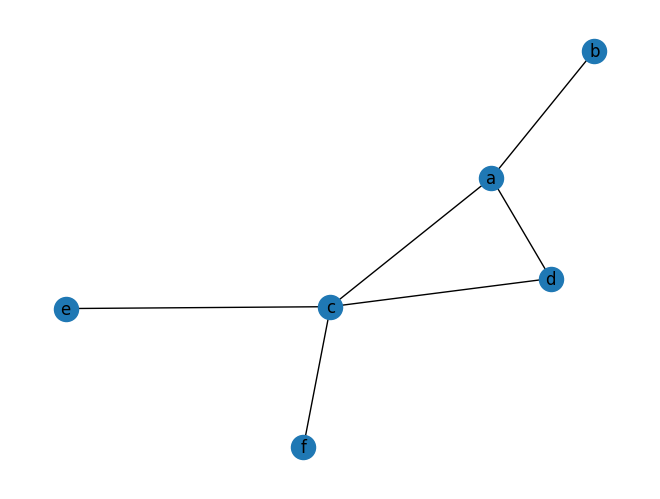

In [ ]:
G = nx.Graph()

G.add_edge("a", "b")
G.add_edge("a", "c")
G.add_edge("c", "d")
G.add_edge("c", "e")
G.add_edge("c", "f")
G.add_edge("a", "d")

nx.draw(G, with_labels=True)


Can you plot a graph of Wikipedia links? Extend the bfs function by plotting a network. Limit the search to a reasonable number of nodes.

# Scrapy

Scrapy is an efficient library for web crawling and scraping. It has a slightly higher entrance level than requests + bs but it's much easier for complex tasks.

In [3]:
import requests
import bs4
import re
from time import sleep
import random

import scrapy
from scrapy.crawler import CrawlerProcess

In [4]:
class MySpider(scrapy.Spider):
    name = "lab1"

    start_urls = ['http://quotes.toscrape.com']

    def parse(self, response):
        quotes = response.css('div.quote')
        for quote in quotes: # you can extract data you need
            yield {
                'text': quote.css('.text::text').get(),
                'author': quote.css('.author::text').get(),
            }

        next_page = response.css('li.next a::attr(href)').get() #find next URL

        if next_page is not None:
            next_page = response.urljoin(next_page)
            yield scrapy.Request(next_page, callback=self.parse) #and process it

In [ ]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(MySpider)
process.start()

2025-10-31 14:39:33 [scrapy.utils.log] INFO: Scrapy 2.13.3 started (bot: scrapybot)
2025-10-31 14:39:33 [scrapy.utils.log] INFO: Versions:
{'lxml': '6.0.2',
 'libxml2': '2.14.6',
 'cssselect': '1.3.0',
 'parsel': '1.10.0',
 'w3lib': '2.3.1',
 'Twisted': '24.3.0',
 'Python': '3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]',
 'pyOpenSSL': '23.2.0 (OpenSSL 3.0.13 30 Jan 2024)',
 'cryptography': '41.0.7',
 'Platform': 'Linux-6.6.87.2-microsoft-standard-WSL2-x86_64-with-glibc2.39'}
2025-10-31 14:39:33 [scrapy.addons] INFO: Enabled addons:
[]
2025-10-31 14:39:33 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-10-31 14:39:33 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop
2025-10-31 14:39:33 [scrapy.extensions.telnet] INFO: Telnet Password: b33bc1ed3f97a8ed
2025-10-31 14:39:33 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.T

RuntimeError: This event loop is already running

2025-10-31 14:39:33 [scrapy.core.engine] INFO: Spider opened
2025-10-31 14:39:33 [scrapy.extensions.logstats] INFO: Crawled 0 pages (at 0 pages/min), scraped 0 items (at 0 items/min)
2025-10-31 14:39:33 [scrapy.extensions.telnet] INFO: Telnet console listening on 127.0.0.1:6023
2025-10-31 14:39:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://quotes.toscrape.com> (referer: None)
2025-10-31 14:39:34 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com>
{'text': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', 'author': 'Albert Einstein'}
2025-10-31 14:39:34 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com>
{'text': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', 'author': 'J.K. Rowling'}
2025-10-31 14:39:34 [scrapy.core.scraper] DEBUG: Scraped from <200 http://quotes.toscrape.com>
{'text': '“There are only two ways to live y

: 

## Additional task

Which color of a car is the most expensive? Analyze offers from https://www.olx.pl/motoryzacja/samochody/ some of them leads to olx while other to otomoto. Can you use data from both sources?

<details>

<summary>Bonus</summary>

Funny website for scraping https://web.archive.org/web/20190615072453/https://sirius.cs.put.poznan.pl/~inf66204/WKC.html
</details>